In [63]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import requests
import pytz
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
! dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 681B-19D9

 Directory of C:\Users\gokek\Documents

2022-10-01  01:41 PM    <DIR>          .
2022-09-26  10:56 PM    <DIR>          ..
2022-09-25  09:52 PM               132 .env
2022-09-25  06:07 PM    <DIR>          .ipynb_checkpoints
2022-09-25  06:04 PM           468,613 financial-planner-checkpoint.ipynb
2022-09-16  07:42 PM             7,421 MCForecastTools.py
2022-10-01  01:39 PM            57,185 Personal_financial.ipynb
2022-09-25  06:05 PM    <DIR>          Untitled Folder
2022-10-01  01:41 PM    <DIR>          __pycache__
               4 File(s)        533,351 bytes
               5 Dir(s)  127,247,941,632 bytes free


## Instructions

### Part 1 - Personal Finance Planner

In this section of the challenge, you will create a personal finance planner application. To develop the personal finance planner prototype, you should take into account the following assumptions:

* The average household income for each member of the credit union is $12,000.

* Every union member has a savings portfolio composed of cryptocurrencies, stocks and bonds:

    * Assume the following amount of crypto assets: `1.2` BTC and `5.3` ETH.

    * Assume the following amount of shares in stocks and bonds: `50` SPY (stocks) and `200` AGG (bonds).

Use the starter Jupyter notebook to complete the following steps.

#### Collect Crypto Prices Using the `requests` Library

1. Create two variables called `my_btc` and `my_eth`. Set them equal to `1.2` and `5.3`, respectively.

2. Use the `requests` library to fetch the current price in Canadian dollars (`CAD`) of bitcoin (`BTC`) and ethereum (`ETH`) using the **Alternative Free Crypto API** endpoints provided in the starter notebook.

3. Parse the API JSON response to select only the crypto prices and store each price in a variable.

    **Hint:** Be aware of the particular identifier for each cryptocurrency in the API JSON response - the bitcoin identifier is `1` whereas ethereum is `1027`.

4. Compute the portfolio value of cryptocurrencies and print the results.


In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
btc_url = 'https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD'
btc_response = requests.get(btc_url).json()
print(btc_response)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19166112, 'total_supply': 19166112, 'max_supply': 21000000, 'quotes': {'USD': {'price': 19286.58, 'volume_24h': 20552592011, 'market_cap': 369790001081, 'percentage_change_1h': -0.0932482957853403, 'percentage_change_24h': -2.37749547514746, 'percentage_change_7d': -0.0275782630394996, 'percent_change_1h': -0.0932482957853403, 'percent_change_24h': -2.37749547514746, 'percent_change_7d': -0.0275782630394996}, 'CAD': {'price': 26679.126114, 'volume_24h': 28430400528.8163, 'market_cap': 511530508495.347, 'percent_change_1h': -0.0932482957853403, 'percent_change_24h': -2.37749547514746, 'percent_change_7d': -0.0275782630394996}}, 'last_updated': 1664645928}}, 'metadata': {'timestamp': 1664645928, 'num_cryptocurrencies': 3116, 'error': None}}


In [5]:
btc_response['data']['1']['name']

'Bitcoin'

In [6]:
eth_url = 'https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD'
eth_response = requests.get(eth_url).json()
print(eth_response)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 120763013, 'total_supply': 120763013, 'max_supply': 120763013, 'quotes': {'USD': {'price': 1311.32, 'volume_24h': 6106541648, 'market_cap': 158156695630, 'percentage_change_1h': -0.337053828281034, 'percentage_change_24h': -3.06125380368764, 'percentage_change_7d': -1.37147347198143, 'percent_change_1h': -0.337053828281034, 'percent_change_24h': -3.06125380368764, 'percent_change_7d': -1.37147347198143}, 'CAD': {'price': 1813.948956, 'volume_24h': 8447179061.6784, 'market_cap': 218778157064.979, 'percent_change_1h': -0.337053828281034, 'percent_change_24h': -3.06125380368764, 'percent_change_7d': -1.37147347198143}}, 'last_updated': 1664645924}}, 'metadata': {'timestamp': 1664645924, 'num_cryptocurrencies': 3116, 'error': None}}


In [7]:
eth_response['data']['1027']['name']

'Ethereum'

In [8]:
btc_response['data']

{'1': {'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'website_slug': 'bitcoin',
  'rank': 1,
  'circulating_supply': 19166112,
  'total_supply': 19166112,
  'max_supply': 21000000,
  'quotes': {'USD': {'price': 19286.58,
    'volume_24h': 20552592011,
    'market_cap': 369790001081,
    'percentage_change_1h': -0.0932482957853403,
    'percentage_change_24h': -2.37749547514746,
    'percentage_change_7d': -0.0275782630394996,
    'percent_change_1h': -0.0932482957853403,
    'percent_change_24h': -2.37749547514746,
    'percent_change_7d': -0.0275782630394996},
   'CAD': {'price': 26679.126114,
    'volume_24h': 28430400528.8163,
    'market_cap': 511530508495.347,
    'percent_change_1h': -0.0932482957853403,
    'percent_change_24h': -2.37749547514746,
    'percent_change_7d': -0.0275782630394996}},
  'last_updated': 1664645928}}

In [9]:
btc_response['data']['1']

{'id': 1,
 'name': 'Bitcoin',
 'symbol': 'BTC',
 'website_slug': 'bitcoin',
 'rank': 1,
 'circulating_supply': 19166112,
 'total_supply': 19166112,
 'max_supply': 21000000,
 'quotes': {'USD': {'price': 19286.58,
   'volume_24h': 20552592011,
   'market_cap': 369790001081,
   'percentage_change_1h': -0.0932482957853403,
   'percentage_change_24h': -2.37749547514746,
   'percentage_change_7d': -0.0275782630394996,
   'percent_change_1h': -0.0932482957853403,
   'percent_change_24h': -2.37749547514746,
   'percent_change_7d': -0.0275782630394996},
  'CAD': {'price': 26679.126114,
   'volume_24h': 28430400528.8163,
   'market_cap': 511530508495.347,
   'percent_change_1h': -0.0932482957853403,
   'percent_change_24h': -2.37749547514746,
   'percent_change_7d': -0.0275782630394996}},
 'last_updated': 1664645928}

In [10]:
btc_response['data']['1']['quotes']

{'USD': {'price': 19286.58,
  'volume_24h': 20552592011,
  'market_cap': 369790001081,
  'percentage_change_1h': -0.0932482957853403,
  'percentage_change_24h': -2.37749547514746,
  'percentage_change_7d': -0.0275782630394996,
  'percent_change_1h': -0.0932482957853403,
  'percent_change_24h': -2.37749547514746,
  'percent_change_7d': -0.0275782630394996},
 'CAD': {'price': 26679.126114,
  'volume_24h': 28430400528.8163,
  'market_cap': 511530508495.347,
  'percent_change_1h': -0.0932482957853403,
  'percent_change_24h': -2.37749547514746,
  'percent_change_7d': -0.0275782630394996}}

In [11]:
btc_response['data']['1']['quotes']['CAD']

{'price': 26679.126114,
 'volume_24h': 28430400528.8163,
 'market_cap': 511530508495.347,
 'percent_change_1h': -0.0932482957853403,
 'percent_change_24h': -2.37749547514746,
 'percent_change_7d': -0.0275782630394996}

In [12]:
# current price in Canadian dollars (`CAD`) of bitcoin (`BTC`)
btc_response['data']['1']['quotes']['CAD']['price']

26679.126114

In [13]:
# Current price in Canadian dollars (`CAD`) of ethereum (`ETH`) 
eth_response=eth_response['data']['1027']['quotes']['CAD']['price']
eth_response

1813.948956

In [14]:
# Print current value of cryptocurrencies
btc_response
eth_response
btc_price=btc_response['data']['1']['quotes']['CAD']['price']
print(f"The current value of your {my_btc} BTC is ${btc_price:0.2f}")
#print(f"The current value of your {my_eth} ETH is ${eth_response:0.2f}")

The current value of your 1.2 BTC is $26679.13


In [16]:
# Print current value of cryptocurrencies
#btc_response
eth_response
#eth_price=eth_response['data']['1027']['quotes']['CAD']['price']
##print(f"The current value of your {my_eth} ETH is ${eth_price:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_response:0.2f}")

The current value of your 5.3 ETH is $1813.95


#### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

1. Create two variables named `my_agg` and `my_spy` and set them equal to `200` and `50`, respectively.

2. Set the Alpaca API key and secret key variables, then create the Alpaca API object using the `tradeapi.REST` function from the Alpaca SDK.

3. Format the current date as ISO format. You may change the date set in the starter code to the current date.

4. Get the current closing prices for `SPY` and `AGG` using Alpaca's `get_bars()` function. Transform the function's response to a Pandas DataFrame and preview the data.

5. Pick the `SPY` and `AGG` close prices from the Alpaca's `get_bars()` DataFrame response and store them as Python variables. Print the closing values for validation.

6. Compute the value in dollars of the current amount of shares and print the results.

In [17]:

[df_savings](Images/df_savings.png)

# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

# Set current amount of shares
my_agg = 200
my_spy = 50

In [18]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [108]:
# Set the ticker
ticker = "SPY"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp("2018-09-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-30", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for SPY
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-10-01 04:00:00+00:00,292.12,292.930,290.98,291.73,62578937,254454,291.962582
2018-10-02 04:00:00+00:00,291.57,292.355,291.14,291.56,47288227,220334,291.709802
2018-10-03 04:00:00+00:00,292.74,293.210,291.32,291.72,64695630,258733,292.253915
2018-10-04 04:00:00+00:00,291.22,291.240,287.66,289.44,112856465,478297,289.463236
2018-10-05 04:00:00+00:00,289.65,290.270,286.22,287.82,106032068,467058,288.115984


In [110]:
# Set the ticker
ticker = "SPY"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp("2018-09-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-30", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for SPY
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.tail()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-09-26 04:00:00+00:00,366.41,370.21,363.0299,364.31,91731346,633024,365.928441
2022-09-27 04:00:00+00:00,368.01,370.40,360.8700,363.38,105884493,771522,364.580711
2022-09-28 04:00:00+00:00,364.44,372.30,362.6000,370.53,109578062,704940,367.937105
2022-09-29 04:00:00+00:00,366.72,367.11,359.7000,362.79,112068880,789244,362.805405
2022-09-30 04:00:00+00:00,361.93,365.91,357.0400,357.18,152567865,847859,360.660373


In [111]:
# Set the ticker
ticker = "AGG"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp("2018-09-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-30", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for SPY
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-10-01 04:00:00+00:00,105.28,105.3500,105.2000,105.24,3518389,10736,105.264691
2018-10-02 04:00:00+00:00,105.32,105.4600,105.2500,105.36,6912595,17110,105.384980
2018-10-03 04:00:00+00:00,105.22,105.2400,104.7500,104.86,2540484,12195,104.988470
2018-10-04 04:00:00+00:00,104.65,104.7171,104.4701,104.56,5268197,14128,104.562689
2018-10-05 04:00:00+00:00,104.46,104.4800,104.1900,104.33,3460792,15198,104.323907


In [112]:
# Set the ticker
ticker = "AGG"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp("2018-09-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-30", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for SPY
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.tail()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-09-26 04:00:00+00:00,96.87,96.9100,95.865,95.95,8467717,32092,96.272680
2022-09-27 04:00:00+00:00,95.96,96.0750,95.375,95.54,11400353,35134,95.649073
2022-09-28 04:00:00+00:00,96.47,97.1277,96.270,97.08,10530370,38055,96.834989
2022-09-29 04:00:00+00:00,96.48,96.7999,96.290,96.57,8133673,33252,96.544743
2022-09-30 04:00:00+00:00,96.86,97.0900,96.190,96.34,14356507,43323,96.572541


In [113]:
# Format current date as ISO format
start_date = pd.Timestamp("2018-09-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-30", tz="America/New_York").isoformat()

# Get current price data for AGG and SPY
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Display sample data
df_portfolio

SPY                                        \
                             open     high       low   close     volume   
timestamp                                                                 
2018-10-01 04:00:00+00:00  292.12  292.930  290.9800  291.73   62578937   
2018-10-02 04:00:00+00:00  291.57  292.355  291.1400  291.56   47288227   
2018-10-03 04:00:00+00:00  292.74  293.210  291.3200  291.72   64695630   
2018-10-04 04:00:00+00:00  291.22  291.240  287.6600  289.44  112856465   
2018-10-05 04:00:00+00:00  289.65  290.270  286.2200  287.82  106032068   
...                           ...      ...       ...     ...        ...   
2022-09-26 04:00:00+00:00  366.41  370.210  363.0299  364.31   91731346   
2022-09-27 04:00:00+00:00  368.01  370.400  360.8700  363.38  105884493   
2022-09-28 04:00:00+00:00  364.44  372.300  362.6000  370.53  109578062   
2022-09-29 04:00:00+00:00  366.72  367.110  359.7000  362.79  112068880   
2022-09-30 04:00:00+00:00  361.93  365.910  357.0400  357.18  152567865   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2018-10-01 04:00:00+00:00      254454  291.962582  105.28  105.3500  105.2000   
2018-10-02 04:00:00+00:00      220334  291.709802  105.32  105.4600  105.2500   
2018-10-03 04:00:00+00:00      258733  292.253915  105.22  105.2400  104.7500   
2018-10-04 04:00:00+00:00      478297  289.463236  104.65  104.7171  104.4701   
2018-10-05 04:00:00+00:00      467058  288.115984  104.46  104.4800  104.1900   
...                               ...         ...     ...       ...       ...   
2022-09-26 04:00:00+00:00      633024  365.928441   96.87   96.9100   95.8650   
2022-09-27 04:00:00+00:00      771522  364.580711   95.96   96.0750   95.3750   
2022-09-28 04:00:00+00:00      704940  367.937105   96.47   97.1277   96.2700   
2022-09-29 04:00:00+00:00      789244  362.805405   96.48   96.7999   96.2900   
2022-09-30 04:00:00+00:00      847859  360.660373   96.86   97.0900   96.1900   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-10-01 04:00:00+00:00  105.24   3518389       10736  105.264691  
2018-10-02 04:00:00+00:00  105.36   6912595       17110  105.384980  
2018-10-03 04:00:00+00:00  104.86   2540484       12195  104.988470  
2018-10-04 04:00:00+00:00  104.56   5268197       14128  104.562689  
2018-10-05 04:00:00+00:00  104.33   3460792       15198  104.323907  
...                           ...       ...         ...         ...  
2022-09-26 04:00:00+00:00   95.95   8467717       32092   96.272680  
2022-09-27 04:00:00+00:00   95.54  11400353       35134   95.649073  
2022-09-28 04:00:00+00:00   97.08  10530370       38055   96.834989  
2022-09-29 04:00:00+00:00   96.57   8133673       33252   96.544743  
2022-09-30 04:00:00+00:00   96.34  14356507       43323   96.572541  

[1008 rows x 14 columns]

In [114]:
# Fetch the current closing prices from the DataFrame
df_portfolio["SPY"]["close"]

timestamp
2018-10-01 04:00:00+00:00    291.73
2018-10-02 04:00:00+00:00    291.56
2018-10-03 04:00:00+00:00    291.72
2018-10-04 04:00:00+00:00    289.44
2018-10-05 04:00:00+00:00    287.82
                              ...  
2022-09-26 04:00:00+00:00    364.31
2022-09-27 04:00:00+00:00    363.38
2022-09-28 04:00:00+00:00    370.53
2022-09-29 04:00:00+00:00    362.79
2022-09-30 04:00:00+00:00    357.18
Name: close, Length: 1008, dtype: float64

In [115]:
# Fetch the current closing prices from the DataFrame
SPY_close_price = (df_portfolio["SPY"]["close"])
AGG_close_price = (df_portfolio["AGG"]["close"])

# Print SPY and AGG close prices
print(f"Current SPY closing price: ${SPY_close_price}")
print(f"Current AGG closing price: ${AGG_close_price}")

Current SPY closing price: $timestamp
2018-10-01 04:00:00+00:00    291.73
2018-10-02 04:00:00+00:00    291.56
2018-10-03 04:00:00+00:00    291.72
2018-10-04 04:00:00+00:00    289.44
2018-10-05 04:00:00+00:00    287.82
                              ...  
2022-09-26 04:00:00+00:00    364.31
2022-09-27 04:00:00+00:00    363.38
2022-09-28 04:00:00+00:00    370.53
2022-09-29 04:00:00+00:00    362.79
2022-09-30 04:00:00+00:00    357.18
Name: close, Length: 1008, dtype: float64
Current AGG closing price: $timestamp
2018-10-01 04:00:00+00:00    105.24
2018-10-02 04:00:00+00:00    105.36
2018-10-03 04:00:00+00:00    104.86
2018-10-04 04:00:00+00:00    104.56
2018-10-05 04:00:00+00:00    104.33
                              ...  
2022-09-26 04:00:00+00:00     95.95
2022-09-27 04:00:00+00:00     95.54
2022-09-28 04:00:00+00:00     97.08
2022-09-29 04:00:00+00:00     96.57
2022-09-30 04:00:00+00:00     96.34
Name: close, Length: 1008, dtype: float64


In [172]:
#AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")

Current AGG closing price: $timestamp
2018-10-01 04:00:00+00:00    105.24
2018-10-02 04:00:00+00:00    105.36
2018-10-03 04:00:00+00:00    104.86
2018-10-04 04:00:00+00:00    104.56
2018-10-05 04:00:00+00:00    104.33
                              ...  
2022-09-26 04:00:00+00:00     95.95
2022-09-27 04:00:00+00:00     95.54
2022-09-28 04:00:00+00:00     97.08
2022-09-29 04:00:00+00:00     96.57
2022-09-30 04:00:00+00:00     96.34
Name: close, Length: 1008, dtype: float64
Current SPY closing price: $timestamp
2018-10-01 04:00:00+00:00    291.73
2018-10-02 04:00:00+00:00    291.56
2018-10-03 04:00:00+00:00    291.72
2018-10-04 04:00:00+00:00    289.44
2018-10-05 04:00:00+00:00    287.82
                              ...  
2022-09-26 04:00:00+00:00    364.31
2022-09-27 04:00:00+00:00    363.38
2022-09-28 04:00:00+00:00    370.53
2022-09-29 04:00:00+00:00    362.79
2022-09-30 04:00:00+00:00    357.18
Name: close, Length: 1008, dtype: float64


In [196]:
# Pick AGG and SPY close prices
AGG_close_price = float(df_portfolio['AGG']['close'][1007])
SPY_close_price = float(df_portfolio['SPY']['close'][1007])

# Print AGG and SPY close prices
print(f'Current AGG closing price: ${AGG_close_price}')
print(f'Current SPY closing price: ${SPY_close_price}')

Current AGG closing price: $96.34
Current SPY closing price: $357.18


In [208]:
# Compute the current value in dollars of the stock portfolio
spy_value = SPY_close_price * my_spy
agg_value = AGG_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $17859.00
The current value of your 200 AGG shares is $19268.00


In [213]:
# Create share_value DataFrame
share_value={'values': [spy_value, agg_value]}
tickers= ["SPY", "AGG"]
df_share_value= pd.DataFrame(share_value, index=tickers)
df_share_value

,values
SPY,17859.0
AGG,19268.0


In [214]:
# Add column `value` to `df_share_value` to show current values of stocks
df_share_value['values']=[spy_value, agg_value]
df_share_value

,values
SPY,17859.0
AGG,19268.0


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='values'>

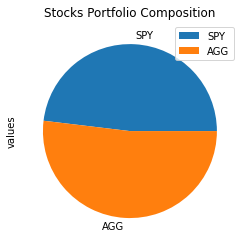

In [216]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_share_value.plot.pie(y="values", title="Stocks Portfolio Composition")

<AxesSubplot:title={'center':'Current Value in Dollars of Stock Portfolio'}>

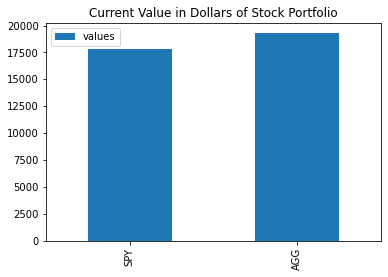

In [217]:
# Create a bar plot to show the value of shares
df_share_value.plot.bar(y="values", title="Current Value in Dollars of Stock Portfolio")

In [ ]:
#### Savings Health Analysis

In this section, you will assess the financial health of the credit union's members.

1. Create a variable called `monthly_income` and set its value to `12000`.

2. To analyze savings health, create a DataFrame called `df_savings` with two rows. Store the total value in dollars of the crypto assets in the first row and the total value of the shares in the second row.

    **Hint:** The `df_savings` DataFrame should have one column named `amount` and two rows where `crypto` and `shares` are the index values:

    ![df_savings](Images/df_savings.png)

3. Use the `df_savings` DataFrame to plot a pie chart to visualize the composition of personal savings.

4. Use `if` conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

    * If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

    * If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

    * If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

In [ ]:
#Set monthly_income to its value
monthly_income=12000

In [133]:
df_savings_url=![df_savings](Images/df_savings.png)

In [161]:
btc_value=26679.126114
eth_value=1813.948956

In [162]:
# Consolidate financial ssets data
# BTC/ETH
crypto_value= {'crypto assets':[btc_value, eth_value]}
df_crypto_shares = pd.DataFrame(crypto_value)
total_btc_eth= df_crypto_shares.sum()
total_btc_eth[0]

28493.07507

In [163]:
agg_value=96.34
spy_value=357.18

In [183]:
#SHARES
shares_value={
"shares assets": [agg_value, spy_value]
}
df_shares_assets = pd.DataFrame(shares_value, index=tickers)
total_shares= df_shares_assets.sum()
total_shares[0]

76253.0

In [219]:
# Create savings DataFrame
savings_data={'savings': [total_btc_eth[0], total_shares[0]]}
tickers= ["crypto", "shares"]
df_savings= pd.DataFrame(savings_data, index=tickers)
df_savings

,savings
crypto,28493.07507
shares,76253.00000


<AxesSubplot:title={'center':'composition of personal savings'}, ylabel='savings'>

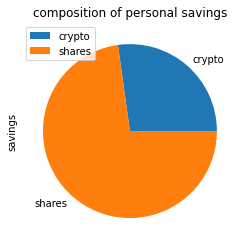

In [185]:
# Plot savings pie chart
df_savings.plot.pie(y= 'savings', title= 'composition of personal savings')

<AxesSubplot:title={'center':'composition of personal savings'}>

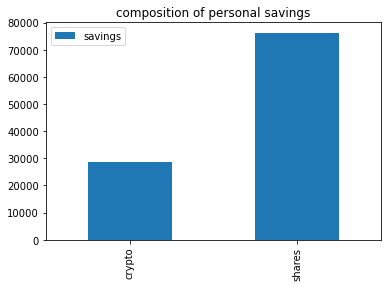

In [186]:
# Create a bar plot to show the value of shares
df_savings.plot.bar(y="savings", title="composition of personal savings")

In [187]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [188]:
# Calculate total amount of savings
total_savings=df_savings.sum()
total_savings[0]

104746.07506999999

In [218]:
# Validate saving health
saving_difference=[]
saving_difference= total_savings[0]-[emergency_fund]
saving_difference[0]
print(f"Net saving is ${saving_difference[0]:0.2f}")
print("Congratulations! You have enough money in your emergency fund")

Net saving is $68746.08
Congratulations! You have enough money in your emergency fund


# Run the Monte Carlo Simulation

In [220]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
AGG_SPY = MCSimulation(
  portfolio_data = df_portfolio,
  num_simulation = num_sims,
  num_trading_days = 252
)

In [221]:
# Run Monte Carlo simulations to forecast one year daily returns
AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gokek\Documents\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998003,1.004478,0.993724,1.005477,0.999684,1.012852,0.998670,0.982830,1.004656,1.000180,...,1.001314,0.999900,0.997610,0.997500,1.004804,1.005896,1.002475,0.983645,1.007833,0.984468
2,0.995594,1.014378,0.989244,1.008799,0.997894,1.021644,0.999931,0.983482,1.004515,0.993303,...,1.011739,0.996979,1.000309,0.985691,0.998725,1.002525,1.002266,0.990928,1.000461,0.981765
3,0.999943,1.024998,0.978565,1.017959,1.000841,1.009323,1.005746,0.983197,0.981559,0.983770,...,1.014860,1.007337,1.002184,0.985005,1.003024,0.997373,1.002479,0.995733,0.990118,0.993088
4,0.999611,1.017000,0.991461,1.033239,1.011419,1.014368,0.999358,0.978184,0.973730,0.988071,...,1.015026,1.009178,1.001201,0.974491,1.004851,0.997095,1.007807,0.993037,0.988722,1.006456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.898537,0.901849,1.104770,1.104561,0.925283,1.034932,1.079748,0.937345,0.866507,1.135485,...,1.055362,1.013452,0.839802,1.058352,0.935154,0.868580,1.011784,1.103675,0.765886,1.489716
249,0.905720,0.901225,1.110085,1.101242,0.924540,1.042075,1.090101,0.940141,0.861363,1.131059,...,1.061321,1.016332,0.834772,1.056345,0.936289,0.871189,1.016254,1.113865,0.768825,1.474439
250,0.912875,0.908139,1.109162,1.084956,0.923462,1.042355,1.099824,0.942159,0.872293,1.108414,...,1.063092,1.019655,0.834596,1.055897,0.937525,0.879143,1.027317,1.098172,0.769675,1.463236
251,0.921867,0.909162,1.104289,1.087122,0.930583,1.037776,1.093527,0.946675,0.880424,1.119965,...,1.065813,1.026891,0.844225,1.055776,0.938251,0.878858,1.039579,1.099706,0.771777,1.481889


 Constructs all the necessary attributes for the MCSimulation object.

        Parameters
        ----------
        portfolio_data: pandas.DataFrame
            DataFrame containing stock price information from Alpaca API
        weights: list(float)
            A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
        num_simulation: int
            Number of simulation samples. DEFAULT: 1000 simulation samples
        num_trading_days: int
            Number of trading days to simulate. DEFAULT: 252 days (1 year of business days)

# Check to make sure that all attributes are set
        if not isinstance(portfolio_data, pd.DataFrame):
            raise TypeError("portfolio_data must be a Pandas DataFrame")

# Set weights if empty, otherwise make sure sum of weights equals one.
        if weights == "":
            num_stocks = len(portfolio_data.columns.get_level_values(0).unique())
            weights = [1.0/num_stocks for s in range(0,num_stocks)]
        else:
            if round(sum(weights),2) < .99:
                raise AttributeError("Sum of portfolio weights must equal one.")

# Calculate daily return if not within dataframe
        if not "daily_return" in portfolio_data.columns.get_level_values(1).unique():
            close_df = portfolio_data.xs('close',level=1,axis=1).pct_change()
            tickers = portfolio_data.columns.get_level_values(0).unique()
            column_names = [(x,"daily_return") for x in tickers]
            close_df.columns = pd.MultiIndex.from_tuples(column_names)
            portfolio_data = portfolio_data.merge(close_df,left_index=True,right_index=True).reindex(columns=tickers,level=0)    

 # Set class attributes
        self.portfolio_data = portfolio_data
        self.weights = weights
        self.nSim = num_simulation
        self.nTrading = num_trading_days
        self.simulated_return = ""
        
    def calc_cumulative_return(self):
        """
        Calculates the cumulative return of a stock over time using a Monte Carlo simulation (Brownian motion with drift).

        """

# Plot the Simulated Outcomes for the Next Year (252 Trading Days)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\gokek\Documents\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

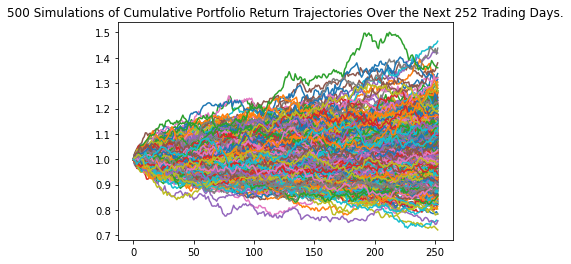

In [119]:
# Plot simulation outcomes
line_plot = AGG_SPY.plot_simulation()

# Configuring a Monte Carlo simulation to forecast five years cumulative returns\n",
    "MC_fiveyear = MCSimulation(\n",
    "    portfolio_data = df_ticker,\n",
    "    weights = [.60,.40],\n",
    "    num_simulation = 500,\n",
    "    num_trading_days = 252*5\n",
    ")"

In [120]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns\n",
AGG_SPY_even_dist = MCSimulation(portfolio_data = df_portfolio, weights = [.4,.6], num_simulation = num_sims, num_trading_days = 252*5)
#Print the simulation input data\n
AGG_SPY_even_dist.portfolio_data.head()
#AGG_SPY_even_dist

SPY                                      \
                             open     high     low   close     volume   
timestamp                                                               
2018-10-01 04:00:00+00:00  292.12  292.930  290.98  291.73   62578937   
2018-10-02 04:00:00+00:00  291.57  292.355  291.14  291.56   47288227   
2018-10-03 04:00:00+00:00  292.74  293.210  291.32  291.72   64695630   
2018-10-04 04:00:00+00:00  291.22  291.240  287.66  289.44  112856465   
2018-10-05 04:00:00+00:00  289.65  290.270  286.22  287.82  106032068   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-10-01 04:00:00+00:00      254454  291.962582          NaN  105.28   
2018-10-02 04:00:00+00:00      220334  291.709802    -0.000583  105.32   
2018-10-03 04:00:00+00:00      258733  292.253915     0.000549  105.22   
2018-10-04 04:00:00+00:00      478297  289.463236    -0.007816  104.65   
2018-10-05 04:00:00+00:00      467058  288.115984    -0.005597  104.46   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2018-10-01 04:00:00+00:00  105.3500  105.2000  105.24  3518389       10736   
2018-10-02 04:00:00+00:00  105.4600  105.2500  105.36  6912595       17110   
2018-10-03 04:00:00+00:00  105.2400  104.7500  104.86  2540484       12195   
2018-10-04 04:00:00+00:00  104.7171  104.4701  104.56  5268197       14128   
2018-10-05 04:00:00+00:00  104.4800  104.1900  104.33  3460792       15198   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-10-01 04:00:00+00:00  105.264691          NaN  
2018-10-02 04:00:00+00:00  105.384980     0.001140  
2018-10-03 04:00:00+00:00  104.988470    -0.004746  
2018-10-04 04:00:00+00:00  104.562689    -0.002861  
2018-10-05 04:00:00+00:00  104.323907    -0.002200

# FIVE YEAR SIMULATION

In [122]:
AGG_SPY_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gokek\Documents\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996536,1.004839,0.997192,1.001437,1.003655,1.003206,1.000629,1.002406,0.999014,1.010454,...,0.999314,1.000258,1.002865,0.995567,1.001879,1.004979,0.999164,1.001494,0.999947,0.995999
2,0.990910,1.010127,0.995145,1.001751,1.002867,0.997148,0.997128,1.007582,0.991974,1.015119,...,1.002269,1.006001,1.008763,0.997925,1.002533,0.997144,0.989813,1.010785,1.006709,0.998673
3,0.991362,1.014408,0.991089,0.991936,0.997491,0.998043,0.993449,1.010386,0.983126,1.006578,...,1.001433,1.015460,1.007231,0.996970,0.999451,1.002977,1.001066,1.019201,0.994831,0.983108
4,0.984025,1.020199,0.988583,0.992154,1.002582,0.995724,0.999932,1.010451,0.993063,1.001853,...,1.002800,1.018232,1.002332,1.002304,1.002487,0.997406,0.994881,1.021327,1.000260,0.987384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.946112,1.114439,1.203153,1.217753,1.055648,1.396689,1.218616,1.103793,0.874843,1.164680,...,0.880874,0.908558,0.732470,1.321074,1.480604,1.194661,1.164080,1.019278,0.740084,1.054045
1257,0.932896,1.127002,1.214626,1.232973,1.057893,1.390200,1.217972,1.098327,0.868088,1.165139,...,0.889937,0.911072,0.735808,1.311563,1.477835,1.194256,1.166329,1.019721,0.736206,1.051895
1258,0.934186,1.122989,1.221829,1.224786,1.066825,1.399161,1.229543,1.096484,0.868986,1.173084,...,0.889008,0.911625,0.741341,1.300469,1.483129,1.200543,1.177363,1.020985,0.733178,1.064260
1259,0.937119,1.122135,1.222824,1.220096,1.062117,1.409541,1.231648,1.099098,0.862906,1.173169,...,0.883798,0.909643,0.738658,1.306435,1.477866,1.197297,1.184915,1.023368,0.731215,1.063862


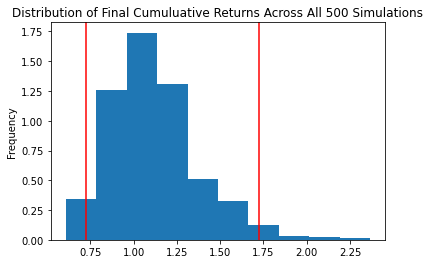

In [225]:
plot_dist= AGG_SPY_even_dist.plot_distribution()

# Plot the Simulated Daily Returns Trajectory for AGG_SPY over the Next Year (252 Trading Days)

In [229]:
AGG_SPY_even_dist_1 = MCSimulation(portfolio_data = df_portfolio, weights = [.4,.6], num_simulation = num_sims, num_trading_days = 252)
#Print the simulation input data\n
AGG_SPY_even_dist_1.portfolio_data.head()

SPY                                      \
                             open     high     low   close     volume   
timestamp                                                               
2018-10-01 04:00:00+00:00  292.12  292.930  290.98  291.73   62578937   
2018-10-02 04:00:00+00:00  291.57  292.355  291.14  291.56   47288227   
2018-10-03 04:00:00+00:00  292.74  293.210  291.32  291.72   64695630   
2018-10-04 04:00:00+00:00  291.22  291.240  287.66  289.44  112856465   
2018-10-05 04:00:00+00:00  289.65  290.270  286.22  287.82  106032068   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-10-01 04:00:00+00:00      254454  291.962582          NaN  105.28   
2018-10-02 04:00:00+00:00      220334  291.709802    -0.000583  105.32   
2018-10-03 04:00:00+00:00      258733  292.253915     0.000549  105.22   
2018-10-04 04:00:00+00:00      478297  289.463236    -0.007816  104.65   
2018-10-05 04:00:00+00:00      467058  288.115984    -0.005597  104.46   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2018-10-01 04:00:00+00:00  105.3500  105.2000  105.24  3518389       10736   
2018-10-02 04:00:00+00:00  105.4600  105.2500  105.36  6912595       17110   
2018-10-03 04:00:00+00:00  105.2400  104.7500  104.86  2540484       12195   
2018-10-04 04:00:00+00:00  104.7171  104.4701  104.56  5268197       14128   
2018-10-05 04:00:00+00:00  104.4800  104.1900  104.33  3460792       15198   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-10-01 04:00:00+00:00  105.264691          NaN  
2018-10-02 04:00:00+00:00  105.384980     0.001140  
2018-10-03 04:00:00+00:00  104.988470    -0.004746  
2018-10-04 04:00:00+00:00  104.562689    -0.002861  
2018-10-05 04:00:00+00:00  104.323907    -0.002200

In [230]:
# Use the `plot` function to visually analyze the trajectory of AGG_SPY stock daily returns on a 252 trading day simulation
AGG_SPY_even_dist_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\gokek\Documents\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006262,0.993497,1.001426,0.997652,0.998743,0.995796,0.999556,0.996492,0.995928,0.996186,...,0.997844,1.000534,1.004497,0.994332,1.001138,1.003858,1.001958,0.992038,0.992988,0.986042
2,0.992782,0.991539,1.009729,1.002085,0.995584,1.002607,0.998534,1.001745,0.994583,0.994590,...,0.999079,0.997748,1.007049,0.998679,1.001560,1.004108,1.008234,0.989237,1.003716,0.984503
3,1.001201,0.979949,1.005809,1.003526,0.993859,1.010858,0.991091,1.006515,0.992573,1.001194,...,0.996422,0.992933,1.000955,0.997792,1.015896,0.993632,1.008178,1.000497,1.012806,0.993069
4,0.996244,0.973446,1.004149,1.005197,0.990798,1.020528,0.989110,1.009816,0.995983,0.997917,...,0.984897,0.992835,1.003410,1.001113,1.024094,0.984532,0.995618,0.998685,1.019627,0.991719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.901495,0.901860,1.000363,1.151848,1.088546,0.982073,1.179089,1.075767,0.835200,0.961319,...,0.944868,1.016004,0.986491,1.065690,0.965115,1.164916,0.985638,0.854592,1.082498,0.877473
249,0.901700,0.902419,0.993652,1.151329,1.085437,0.992778,1.187697,1.081886,0.835821,0.965524,...,0.946295,1.010135,0.992565,1.071526,0.958182,1.161385,0.985901,0.854587,1.079877,0.876158
250,0.900576,0.901566,1.004536,1.143668,1.083320,0.975411,1.183521,1.078422,0.831595,0.963611,...,0.939026,1.013770,0.991245,1.073978,0.957179,1.169076,0.980282,0.861983,1.098136,0.875955
251,0.890650,0.914318,1.004813,1.136595,1.086447,0.969034,1.183119,1.076586,0.826040,0.947830,...,0.934572,1.021380,0.998876,1.067394,0.942865,1.171407,0.976468,0.861040,1.105869,0.874355


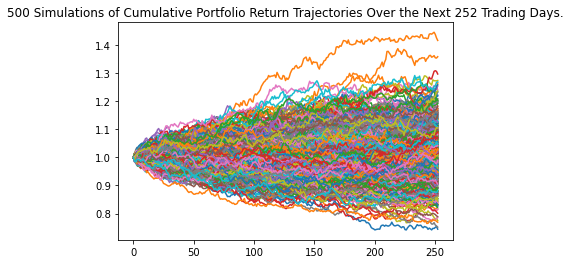

In [231]:
one_year_df=AGG_SPY_even_dist_1.plot_simulation()

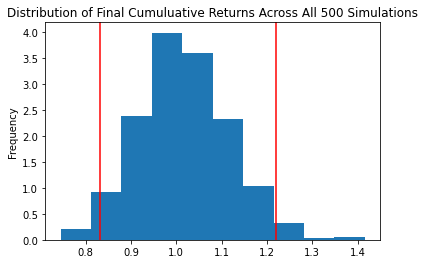

In [232]:
one_year_dist_plot = AGG_SPY_even_dist_1.plot_distribution()

# Calculate the Simulated Profits/Losses of $20,000 Investment in AGG_SPY Over the Next 252 Trading Days¶

# Plot the Simulated Profits/Losses of $20,000 Investment in AGG_SPY Over the Next 252 Trading Days¶

# Calculate the range of the possible outcomes of our $20,000 investments in AGG_SPY stocks

In [233]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = AGG_SPY_even_dist_1.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count           500.000000
mean              1.015158
std               0.100209
min               0.744645
25%               0.948692
50%               1.011923
75%               1.081253
max               1.416010
95% CI Lower      0.832038
95% CI Upper      1.219803
Name: 252, dtype: float64


In [234]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments in AGG_SPY stocks
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next year will end within in the range of $16640.75 and $24396.06.
